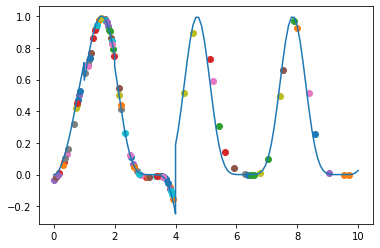

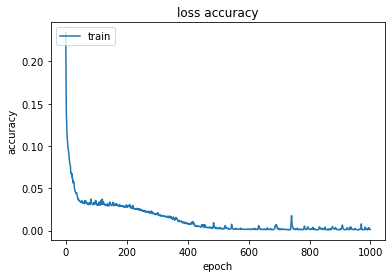

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Lambda
import tensorflow.keras.backend as K
from keras.models import Input, Model, load_model
from keras.layers import Dense
from sklearn.model_selection import train_test_split 
import numpy as np
import matplotlib.pyplot as plt

N=64
z1=np.linspace(0,1,N)
z2=np.linspace(1,2,N)
z3=np.linspace(2,3,N)
z4=np.linspace(3,4,N)
z5=np.linspace(4,10,N)

y1=np.sin(z1)**2
y2=np.sin(z2)**3
y3=np.sin(z3)**4
y4=np.sin(z4)**5
y5=np.sin(z5)**6


X=np.concatenate((z1,z2,z3,z4,z5))
y=np.concatenate((y1,y2,y3,y4,y5,))

#y=np.matrix(y).T
#plt.plot(X,y)
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3)

model=Sequential()
model.add(layers.Input(shape=(1,), name='main_input'))
model.add(Dense(200, activation='tanh')) 
model.add(Dense(100, activation='tanh')) 
model.add(Dense(32, activation='tanh')) 
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mse'])

history=model.fit(X_train, y_train,  epochs=1000, verbose=0)

predictionResults=model.predict(X_test)

index=0
results=predictionResults.flatten()
for value in X_test:
    plt.scatter(value,results[index])
    index+=1
plt.plot(X,y)
plt.show()

plt.plot(history.history['loss'])
plt.title('loss accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()